In [347]:
import pandas as pd
import numpy as np
import datetime as dt
from math import floor

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('../Prepared_Data.csv', sep=",", index_col=0)
df_copy = df.copy()
df.head()

,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_
ID,,,,,,,,,,,
5524,Graduation,Single,58138.0,3,"(60, 70]",0,663,1617,1,22,4.142857
2174,Graduation,Single,46344.0,2,"(60, 70]",2,113,27,0,4,2.714286
4141,Graduation,Relationship,71613.0,1,"(50, 60]",0,312,776,0,20,1.857143
6182,Graduation,Relationship,26646.0,2,"(30,40]",1,139,53,0,6,1.857143
5324,PhD,Relationship,58293.0,5,"(40,50]",1,161,422,0,14,6.714286


In [348]:
df_ = df.copy()
df_.reset_index(inplace=True)
df_.head()


,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_
0,5524,Graduation,Single,58138.0,3,"(60, 70]",0,663,1617,1,22,4.142857
1,2174,Graduation,Single,46344.0,2,"(60, 70]",2,113,27,0,4,2.714286
2,4141,Graduation,Relationship,71613.0,1,"(50, 60]",0,312,776,0,20,1.857143
3,6182,Graduation,Relationship,26646.0,2,"(30,40]",1,139,53,0,6,1.857143
4,5324,PhD,Relationship,58293.0,5,"(40,50]",1,161,422,0,14,6.714286


In [349]:
int_list = []
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        int_list.append(col)
print(int_list)

['Income', 'NumDealsPurchases', 'Kids', 'Days_Enrolled', 'Total_Spend', 'CouponsAccepted', 'Total_Purchases', 'Recency_']


In [350]:
autoscaler = StandardScaler()
df[int_list] = autoscaler.fit_transform(df[int_list])
df.dtypes

Education             object
Marital_Status        object
Income               float64
NumDealsPurchases    float64
Age                   object
Kids                 float64
Days_Enrolled        float64
Total_Spend          float64
CouponsAccepted      float64
Total_Purchases      float64
Recency_             float64
dtype: object

In [351]:
df.reset_index('ID', inplace=True)

In [352]:
df.reset_index(inplace=True)
df.head()

,index,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_
0,0,5524,Graduation,Single,0.288195,0.348738,"(60, 70]",-1.264308,1.529793,1.680176,0.620456,1.312080,0.306856
1,1,2174,Graduation,Single,-0.262715,-0.168700,"(60, 70]",1.395139,-1.191143,-0.962202,-0.501987,-1.186198,-0.383971
2,2,4141,Graduation,Relationship,0.917627,-0.686137,"(50, 60]",-1.264308,-0.206659,0.282541,-0.501987,1.034493,-0.798467
3,3,6182,Graduation,Relationship,-1.182829,-0.168700,"(30,40]",0.065416,-1.062517,-0.918994,-0.501987,-0.908611,-0.798467
4,4,5324,PhD,Relationship,0.295435,1.383614,"(40,50]",0.065416,-0.953679,-0.305762,-0.501987,0.201734,1.550344


In [353]:
obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)
obj_col

['Education', 'Marital_Status', 'Age']

In [354]:
onehotencoder = OneHotEncoder() 
data = pd.DataFrame(onehotencoder.fit_transform(df[['Age', 'Recency_']]).toarray())
data = data.reset_index()
df = pd.merge(left = df, right = data, on = 'index')
df = df.drop(columns = ['Age'])

In [355]:
obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)
obj_col

['Education', 'Marital_Status']

In [356]:
label_encoder = LabelEncoder()
for col in obj_col:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,index,ID,Education,Marital_Status,Income,NumDealsPurchases,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105
0,0,5524,1,1,0.288195,0.348738,-1.264308,1.529793,1.680176,0.620456,1.312080,0.306856,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2174,1,1,-0.262715,-0.168700,1.395139,-1.191143,-0.962202,-0.501987,-1.186198,-0.383971,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4141,1,0,0.917627,-0.686137,-1.264308,-0.206659,0.282541,-0.501987,1.034493,-0.798467,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,6182,1,0,-1.182829,-0.168700,0.065416,-1.062517,-0.918994,-0.501987,-0.908611,-0.798467,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5324,3,0,0.295435,1.383614,0.065416,-0.953679,-0.305762,-0.501987,0.201734,1.550344,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [357]:
df.drop(columns=[df.columns[0]], inplace=True)
df.set_index('ID', inplace=True)

df.head()

,Education,Marital_Status,Income,NumDealsPurchases,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1,1,0.288195,0.348738,-1.264308,1.529793,1.680176,0.620456,1.312080,0.306856,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2174,1,1,-0.262715,-0.168700,1.395139,-1.191143,-0.962202,-0.501987,-1.186198,-0.383971,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4141,1,0,0.917627,-0.686137,-1.264308,-0.206659,0.282541,-0.501987,1.034493,-0.798467,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6182,1,0,-1.182829,-0.168700,0.065416,-1.062517,-0.918994,-0.501987,-0.908611,-0.798467,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5324,3,0,0.295435,1.383614,0.065416,-0.953679,-0.305762,-0.501987,0.201734,1.550344,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


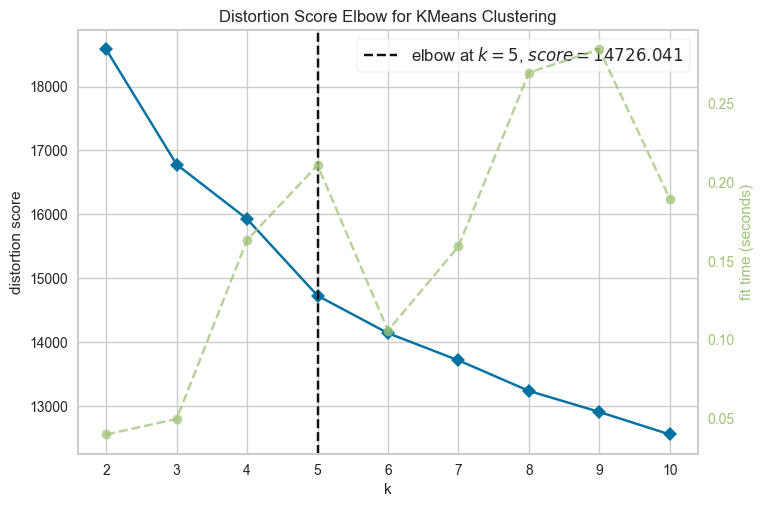

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [358]:
df.columns = df.columns.astype(str)
model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k = 10, random_state = 42)

visualizer.fit(df)
visualizer.show()

In [359]:
kmeans = KMeans(n_clusters = 4, random_state=42).fit(df)
pred = kmeans.predict(df)
df['Cluster'] = pred+1
df = df.reset_index('ID')

data = pd.read_csv('../DataOut.csv')
data = pd.merge(data, df[['ID', 'Cluster']], how='left')



data.head()
data.to_csv('dataOutWithClusters')

In [360]:
df_ = pd.merge(df_, df[['ID', 'Cluster']], how='left')


df_['Cluster'] = df_['Cluster'].astype('str')
df_['Cluster'] = np.where(df_['Cluster'] == '1', "Cluster 1", np.where(df_['Cluster'] == '2', "Cluster 2", np.where(df_['Cluster'] == '3', "Cluster 3", "Cluster 4")))

df_.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_,Cluster
0,5524,Graduation,Single,58138.0,3,"(60, 70]",0,663,1617,1,22,4.142857,Cluster 3
1,2174,Graduation,Single,46344.0,2,"(60, 70]",2,113,27,0,4,2.714286,Cluster 1
2,4141,Graduation,Relationship,71613.0,1,"(50, 60]",0,312,776,0,20,1.857143,Cluster 3
3,6182,Graduation,Relationship,26646.0,2,"(30,40]",1,139,53,0,6,1.857143,Cluster 1
4,5324,PhD,Relationship,58293.0,5,"(40,50]",1,161,422,0,14,6.714286,Cluster 2


In [361]:
df_Edu = pd.DataFrame(df_['Cluster'].value_counts()).reset_index()
df_Edu.columns = ['Cluster', 'Count']

fig = go.Figure(data=[go.Pie(labels=df_Edu['Cluster'], values=df_Edu['Count'], hole=.3)])
fig.update_layout(width=800, height=400, title='Cluster')
fig.show()

In [362]:
fig = px.scatter(df_, x="Income", y="Total_Spend",
                 color="Cluster",
                 hover_data=['Total_Spend', 'Income', 'Cluster'])

fig.update_layout(
    title="Spend vs Income Plot",
    xaxis_title = "Spend",
    yaxis_title = "Income",
    width = 900, height=600
)

fig.show()

In [363]:
df_.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_,Cluster
0,5524,Graduation,Single,58138.0,3,"(60, 70]",0,663,1617,1,22,4.142857,Cluster 3
1,2174,Graduation,Single,46344.0,2,"(60, 70]",2,113,27,0,4,2.714286,Cluster 1
2,4141,Graduation,Relationship,71613.0,1,"(50, 60]",0,312,776,0,20,1.857143,Cluster 3
3,6182,Graduation,Relationship,26646.0,2,"(30,40]",1,139,53,0,6,1.857143,Cluster 1
4,5324,PhD,Relationship,58293.0,5,"(40,50]",1,161,422,0,14,6.714286,Cluster 2


In [364]:
# Importation de Plotly
import plotly.express as px

# Calcul des trois dimensions RFM
rfm_data = pd.DataFrame()

# Récence (Recency)
rfm_data['Recency'] = df_['Recency_']

# Fréquence (Frequency) : Somme des différents types d'achats
rfm_data['Frequency'] = df_['Total_Purchases']

# Monétaire (Monetary) : Total des dépenses
rfm_data['Monetary'] = df_['Total_Spend']

# Ajout de la colonne Cluster pour la couleur dans le graphique
rfm_data['Cluster'] = df_['Cluster']

# Création du graphique interactif en 3D avec Plotly
fig = px.scatter_3d(
    rfm_data, 
    x='Recency', 
    y='Frequency', 
    z='Monetary', 
    color='Cluster',
    title='Segmentation des clients en 3D (RFM)',
    labels={'Recency': 'Récence', 'Frequency': 'Fréquence', 'Monetary': 'Montant dépensé'},
    color_continuous_scale=px.colors.sequential.Viridis
)

# Ajustement de la taille des points dans le graphique
fig.update_traces(marker=dict(size=3))

# Affichage du graphique interactif
fig.show()


In [365]:
df_plot = df_[['Marital_Status', 'Cluster', 'ID']].groupby(['Marital_Status', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Count of Customers"}, inplace=True)


fig = px.bar(df_plot, x="Marital_Status", y="Count of Customers",
             color='Cluster', barmode='group',
             height=400)
fig.show()

Les clients appartenant aux clusters 1 et 3 ont des revenus nettement plus élevés que ceux appartenant aux clusters 2 et 4. Les dépenses du groupe 1 sont les plus élevées, tandis que celles du groupe 4 sont les plus faibles.

In [366]:
df_plot = df_[['Education', 'Cluster', 'ID']].groupby(['Education', 'Cluster']).count()
df_plot.reset_index(inplace=True)
df_plot.rename(columns={"ID":"Count of Customers"}, inplace=True)


fig = px.bar(df_plot, x="Education", y="Count of Customers",
             color='Cluster', barmode='group',
             height=400)
fig.update_layout(title="Education")
fig.show()

Aucun client des clusters 2, 3 et 4 ont plus que l'Éducation basique. C'est logique puisque ce sont les clients qui dépensent beaucoup plus, ils appartiennent à des classes sociales plus élevés.